<a href="https://colab.research.google.com/github/nurikahraman/FoodTracker/blob/main/TEST_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 8.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
import cv2
from ultralytics import YOLO

In [3]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 91.4MB/s]


In [4]:
def predict(chosen_model, img, classes=[], conf=0.5):
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
    else:
        results = chosen_model.predict(img, conf=conf)

    return results


def predict_and_detect(chosen_model, img, classes=[], conf=0.5):
    results = predict(chosen_model, img, classes, conf=conf)

    for result in results:
        for box in result.boxes:
            cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                          (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), 2)
            cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                        (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                        cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1)
    return img #, result


0: 480x640 1 apple, 1 orange, 173.9ms
Speed: 4.4ms preprocess, 173.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 1 bottle, 1 bowl, 2 oranges, 1 carrot, 181.5ms
Speed: 7.6ms preprocess, 181.5ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 9 persons, 2 cars, 203.7ms
Speed: 6.9ms preprocess, 203.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


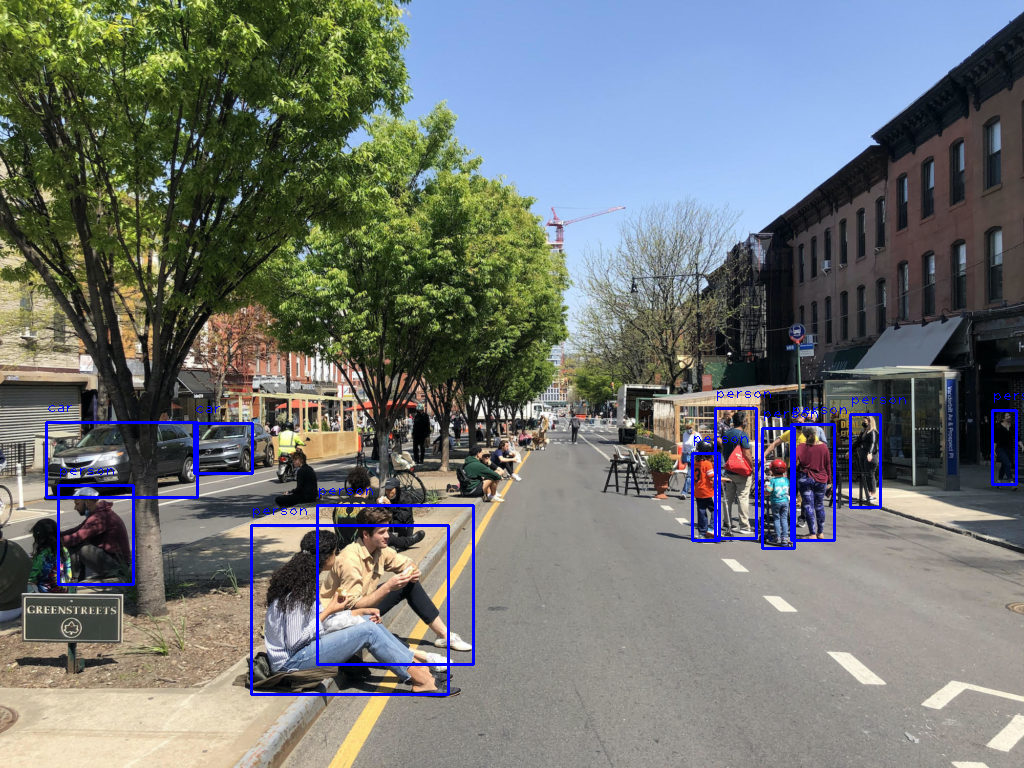

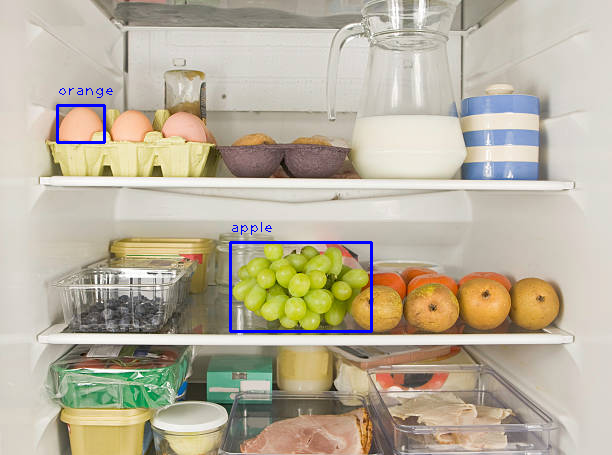

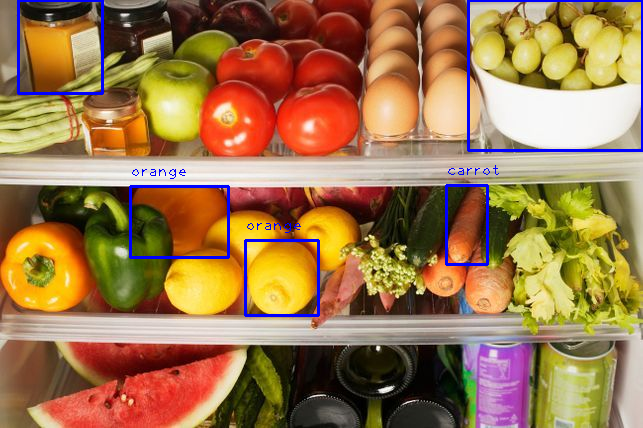

In [7]:
from google.colab.patches import cv2_imshow

# read the image
fridge_image = cv2.imread("/content/FridgeIngredients1.jpg", cv2.IMREAD_UNCHANGED)
result_fridge1_image = predict_and_detect(model, fridge_image, classes=[], conf=0.5)

# read the image
fridge_image = cv2.imread("/content/FridgeIngredients2.jpg", cv2.IMREAD_UNCHANGED)
result_fridge2_image = predict_and_detect(model, fridge_image, classes=[], conf=0.5)

# read the image
street_image = cv2.imread("/content/OpenStreetsVandy-1024x768.jpeg", cv2.IMREAD_UNCHANGED)
result_street_image = predict_and_detect(model, street_image, classes=[], conf=0.5)

# display the images using cv2_imshow()
cv2_imshow(result_street_image)
cv2_imshow(result_fridge1_image)
cv2_imshow(result_fridge2_image)

# save image to Colab Storage
#cv2.imwrite("/content/", result_street_image)
#cv2.waitKey(0)
#cv2.imwrite("/content/", result_fridge_image)
#cv2.waitKey(0)